In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline
from sklearn.model_selection import cross_val_score

In [9]:
train_data = pd.read_csv('train_data_tree.csv')
train_data

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1
...,...,...,...
233,1,0,0
234,1,1,0
235,1,0,1
236,1,1,1


In [10]:
X_train = train_data.drop(['num'], axis=1)
y_train = train_data.num

In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(167.4, 181.2, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(83.7, 108.72, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

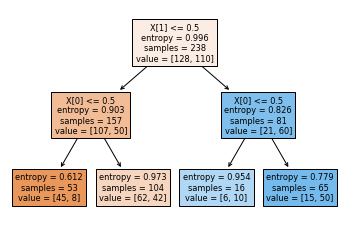

In [12]:
tree.plot_tree(clf, filled=True)

In [25]:
#ищем information gain IG = 0.996 - (n0*E0 + n1*E1)/N

l_node = clf.tree_.children_left[0] # индекс корня левого поддерева
n1 = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
e1 = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева

r_node = clf.tree_.children_right[0] 
n2 = clf.tree_.n_node_samples[r_node]
e2 = clf.tree_.impurity[r_node] 

In [28]:
IG = 0.996 - (n2*e2 + n1*e1)/(n1+n2)
IG

0.11952340688606711

### <center>функции sklearn и стратегии разделения датасэта для тестирования</center>
<b>StratifiedKFold</b> - позволяет сохранять соотношение классов в обучающих и тестовых подвыборках 

<b>ShuffleSplit</b>  - позволяет строить случайные перестановки, таким образом мы можем получить очень много выборок, при этом нет никаких ограничений на то, сколько раз каждый объект должен появиться в обучении или в тесте

<b>LeaveOneOut</b>  - стратегия, которая позволяет оставить каждый объект в тесте один раз, таким образом тестовая выборка всегда состоит из одного объекта и каждый объект из набора данных один раз присутствует в тесте 


Такой порядок связан с количеством последующих прогонов через модель: в обычном сплите получается всего 1 пара train и test datasets, в k-fold кросс-валидации их будет уже k, а в leave-one-out - по числу наблюдений.
